
## **Variables y tipos de datos**

### **Noción de variable**

Representa una característica medible de la unidad de observación.
Ejemplo: “edad”, “género”, “nivel de ingresos”.

---

### **Tipos de variables**

| Tipo                              | Subtipo    | Ejemplo           | Observaciones                               |
| --------------------------------- | ---------- | ----------------- | ------------------------------------------- |
| **Cuantitativa**                  | *Discreta* | Nº de hijos       | Solo enteros                                |
|                                   | *Continua* | Peso, temperatura | Puede tener decimales                       |
| **Cualitativa**                   | *Nominal*  | Color, país       | Sin orden                                   |
|                                   | *Ordinal*  | Nivel educativo   | Con jerarquía                               |
| **Lógica**                        | —          | Verdadero/Falso   | Muy usada en ML                             |
| **Metadatos / Alta cardinalidad** | —          | ID cliente        | Identificadores, no se modelan directamente |

*En machine learning*: elegir bien el tipo de variable define el tipo de preprocesamiento (por ejemplo, normalización, codificación, etc.).

---

## **4. Medidas de resumen**

### 4.1. **Cuantitativas**

| Medida                  | Qué mide                          | Fórmula o idea                          |
| ----------------------- | --------------------------------- | --------------------------------------- |
| **Media**               | Promedio                          | (Σxᵢ)/n                                 |
| **Mediana**             | Valor central                     | Divide el conjunto en dos mitades       |
| **Moda**                | Valor más frecuente               | Aplica también a categorías             |
| **Varianza (s²)**       | Dispersión cuadrática             | Promedio de las diferencias al cuadrado |
| **Desvío estándar (s)** | Dispersión en unidades originales | √varianza                               |

*Interpretación*:
Si dos variables tienen igual media pero distinta desviación estándar, una es más “variable” o dispersa que la otra.

---

### **Cualitativas**

Solo se analizan **frecuencias o proporciones**.
Medidas de tendencia central
    *Moda*: Es la categoría que aparece con mayor frecuencia en el conjunto de datos. Esta es la única medida de tendencia central que se puede usar para datos cualitativos nominales. 
    *Mediana*: Solo se puede calcular para datos cualitativos de tipo ordinal (que se pueden ordenar). 
Ejemplo:

| Categoría | Frecuencia | Porcentaje |
| --------- | ---------- | ---------- |
| Masculino | 60         | 60%        |
| Femenino  | 40         | 40%        |

La **moda categórica** es la categoría más común.

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [12]:
url = "https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/glasdoordata.csv"
df = pd.read_csv(url)
df = df.assign(
    performance=df["performance"].astype("category"),
    seniority=df["seniority"].astype("category")
)
df.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [13]:

numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nColumnas numéricas: {list(numeric_columns)}")

# Calcular varianza y desviación estándar para cada columna numérica
print("\n VARIANZA Y DESVIACIÓN ESTÁNDAR")
results = {}

for col in numeric_columns:
    # Eliminar valores NaN para el cálculo
    data = df[col].dropna()
    
    # Cálculos manuales
    media = np.mean(data)
    n = len(data)
    
    # Varianza poblacional (dividiendo por N)
    varianza_poblacional = np.sum((data - media)**2) / n
    
    # Varianza muestral (dividiendo por n-1)
    varianza_muestral = np.sum((data - media)**2) / (n - 1)
    
    # Desviación estándar
    desv_std_poblacional = np.sqrt(varianza_poblacional)
    desv_std_muestral = np.sqrt(varianza_muestral)
    
    # Usando funciones de numpy (para verificación)
    var_numpy = np.var(data, ddof=1)  # ddof=1 para muestra, ddof=0 para población
    std_numpy = np.std(data, ddof=1)
    
    results[col] = {
        'media': media,
        'varianza_poblacional': varianza_poblacional,
        'varianza_muestral': varianza_muestral,
        'desv_std_poblacional': desv_std_poblacional,
        'desv_std_muestral': desv_std_muestral,
        'n': n
    }
    
    print(f"\n--- {col} ---")
    print(f"Muestra (n): {n}")
    print(f"Media: {media:.2f}")
    print(f"Varianza (poblacional): {varianza_poblacional:.2f}")
    print(f"Varianza (muestral): {varianza_muestral:.2f}")
    print(f"Desviación estándar (poblacional): {desv_std_poblacional:.2f}")
    print(f"Desviación estándar (muestral): {desv_std_muestral:.2f}")
    print(f"Verificación con numpy - Varianza: {var_numpy:.2f}")
    print(f"Verificación con numpy - Desv. std: {std_numpy:.2f}")


Columnas numéricas: ['age', 'income', 'bonus']

 VARIANZA Y DESVIACIÓN ESTÁNDAR

--- age ---
Muestra (n): 1000
Media: 41.39
Varianza (poblacional): 204.14
Varianza (muestral): 204.34
Desviación estándar (poblacional): 14.29
Desviación estándar (muestral): 14.29
Verificación con numpy - Varianza: 204.34
Verificación con numpy - Desv. std: 14.29

--- income ---
Muestra (n): 1000
Media: 94472.65
Varianza (poblacional): 641346576.75
Varianza (muestral): 641988565.31
Desviación estándar (poblacional): 25324.82
Desviación estándar (muestral): 25337.49
Verificación con numpy - Varianza: 641988565.31
Verificación con numpy - Desv. std: 25337.49

--- bonus ---
Muestra (n): 1000
Media: 6467.16
Varianza (poblacional): 4013511.09
Varianza (muestral): 4017528.62
Desviación estándar (poblacional): 2003.37
Desviación estándar (muestral): 2004.38
Verificación con numpy - Varianza: 4017528.62
Verificación con numpy - Desv. std: 2004.38


In [14]:
def display_desviacion(df:pd.DataFrame, column:str):
    
    data = df[column].dropna()
    media = results[column]['media']
    desv_std = results[column]['desv_std_muestral']
    
    plt.figure(figsize=(12, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(media + desv_std, color='orange', linestyle='--', linewidth=2, label=f'±1σ')
    plt.axvline(media - desv_std, color='orange', linestyle='--', linewidth=2)
    plt.axvline(media + 2*desv_std, color='green', linestyle='--', linewidth=1, label=f'±2σ')
    plt.axvline(media - 2*desv_std, color='green', linestyle='--', linewidth=1)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {column}')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data)
    plt.ylabel(column)
    plt.title(f'Boxplot de {column}')
    
    plt.tight_layout()
    plt.show()

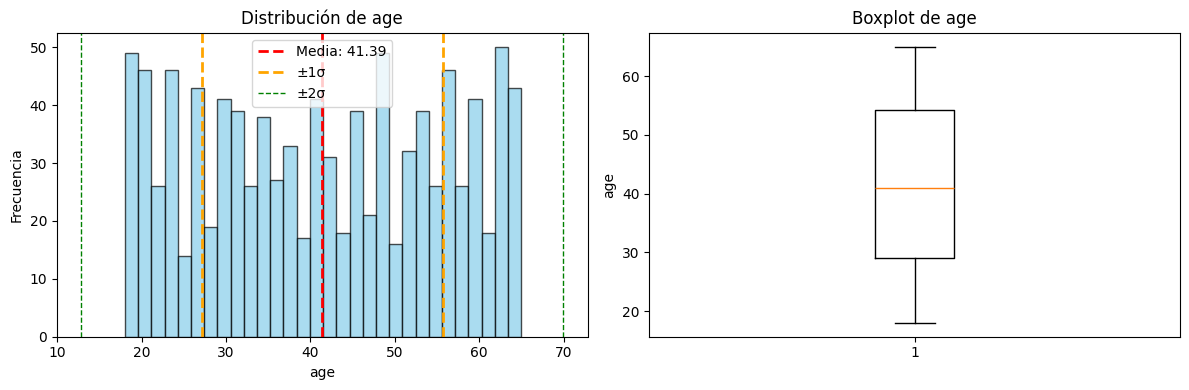

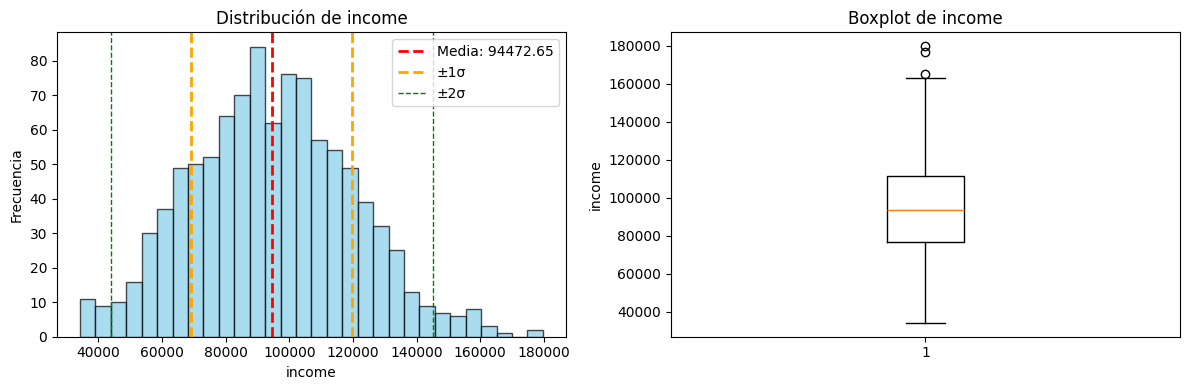

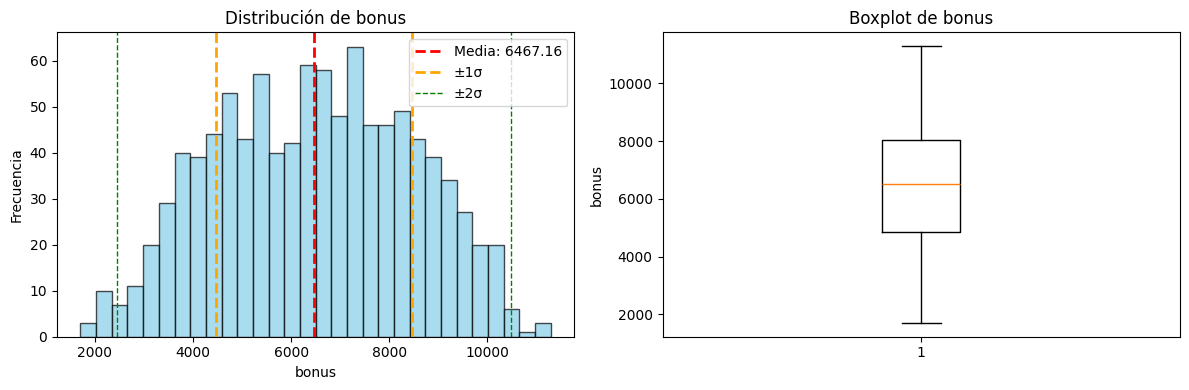

In [15]:
for column in numeric_columns:
    display_desviacion(df, column)

In [16]:
print("RESUMEN COMPARATIVO")
resumen_data = []
for col in numeric_columns:
    media = results[col]['media']
    varianza = results[col]['varianza_muestral']
    desv_std = results[col]['desv_std_muestral']
    coef_variacion = (desv_std / media) * 100 if media != 0 else float('inf')
    
    resumen_data.append({
        'Columna': col,
        'Media': media,
        'Varianza': varianza,
        'Desv_Std': desv_std,
        'Coef_Variacion_%': coef_variacion,
        'n': results[col]['n']
    })

# Crear DataFrame
resumen_df = pd.DataFrame(resumen_data)

# Mostrar el DataFrame
print(resumen_df.round(2))

RESUMEN COMPARATIVO
  Columna     Media      Varianza  Desv_Std  Coef_Variacion_%     n
0     age     41.39  2.043400e+02     14.29             34.53  1000
1  income  94472.65  6.419886e+08  25337.49             26.82  1000
2   bonus   6467.16  4.017529e+06   2004.38             30.99  1000


Mide la variabilidad relativa de los datos en comparación con su tamaño promedio. A diferencia de la desviación estándar (que es una medida absoluta), el CV permite comparar la variabilidad entre diferentes conjuntos de datos, incluso si tienen:

* Diferentes unidades de medida
* Diferentes escalas
* Diferentes magnitudes

```sh
CV < 15%    → BAJA variabilidad (datos muy consistentes)
15% ≤ CV < 30% → MODERADA variabilidad  
CV ≥ 30%    → ALTA variabilidad (datos muy dispersos)
```

In [21]:

print("\n DATAFRAME CON ANÁLISIS INTERPRETATIVO ")

analisis_df = pd.DataFrame({
    'Columna': numeric_columns,
    'Media': [results[col]['media'] for col in numeric_columns],
    'Varianza': [results[col]['varianza_muestral'] for col in numeric_columns],
    'Desv_Std': [results[col]['desv_std_muestral'] for col in numeric_columns],
    'CV_%': [(results[col]['desv_std_muestral'] / results[col]['media']) * 100 
             if results[col]['media'] != 0 else float('inf') 
             for col in numeric_columns],
    'Rango_68%_Inferior': [results[col]['media'] - results[col]['desv_std_muestral'] 
                          for col in numeric_columns],
    'Rango_68%_Superior': [results[col]['media'] + results[col]['desv_std_muestral'] 
                          for col in numeric_columns],
    'Interpretacion_CV': [
        "BAJA variabilidad" if ((results[col]['desv_std_muestral'] / results[col]['media']) * 100) < 15 
        else "MODERADA variabilidad" if ((results[col]['desv_std_muestral'] / results[col]['media']) * 100) < 30 
        else "ALTA variabilidad" 
        for col in numeric_columns
    ]
})

# Formatear el DataFrame
analisis_df_formateado = analisis_df.round({
    'Media': 2,
    'Varianza': 2,
    'Desv_Std': 2,
    'CV_%': 1,
    'Rango_68%_Inferior': 2,
    'Rango_68%_Superior': 2
})

print(analisis_df_formateado.to_string(index=False))


 DATAFRAME CON ANÁLISIS INTERPRETATIVO 
Columna    Media     Varianza  Desv_Std  CV_%  Rango_68%_Inferior  Rango_68%_Superior     Interpretacion_CV
    age    41.39       204.34     14.29  34.5               27.10               55.69     ALTA variabilidad
 income 94472.65 641988565.31  25337.49  26.8            69135.16           119810.15 MODERADA variabilidad
  bonus  6467.16   4017528.62   2004.38  31.0             4462.78             8471.54     ALTA variabilidad


In [22]:
print("RESUMEN FINAL - MEDIDAS DE VARIABILIDAD")

styled_df = (analisis_df_formateado.style
    .format({
        'Media': '{:.2f}',
        'Varianza': '{:.2f}', 
        'Desv_Std': '{:.2f}',
        'CV_%': '{:.1f}%',
        'Rango_68%_Inferior': '{:.2f}',
        'Rango_68%_Superior': '{:.2f}'
    })
    .background_gradient(subset=['Varianza'], cmap='Reds')
    .background_gradient(subset=['Desv_Std'], cmap='Blues')
    .background_gradient(subset=['CV_%'], cmap='viridis')
    )

styled_df

RESUMEN FINAL - MEDIDAS DE VARIABILIDAD


,Columna,Media,Varianza,Desv_Std,CV_%,Rango_68%_Inferior,Rango_68%_Superior,Interpretacion_CV
0,age,41.39,204.34,14.29,34.5%,27.10,55.69,ALTA variabilidad
1,income,94472.65,641988565.31,25337.49,26.8%,69135.16,119810.15,MODERADA variabilidad
2,bonus,6467.16,4017528.62,2004.38,31.0%,4462.78,8471.54,ALTA variabilidad


## Intervalos de confianza

Los intervalos de confianza permiten estimar un rango donde se encuentra un parámetro poblacional con un cierto nivel de confianza.
Los IC nos permiten expresar no solo una estimación puntual, sino también el margen de error de esa estimación.

In [24]:
def calcular_intervalo_confianza(data, confianza=0.95):
    n = len(data)
    media = np.mean(data)
    desv_std = np.std(data, ddof=1)  # Muestral
    
    # Valor crítico t (usamos t-student para muestras pequeñas, normal para grandes)
    if n < 30:
        valor_critico = stats.t.ppf((1 + confianza) / 2, n-1)
    else:
        valor_critico = stats.norm.ppf((1 + confianza) / 2)
    
    # Error estándar
    error_estandar = desv_std / np.sqrt(n)
    
    # Margen de error
    margen_error = valor_critico * error_estandar
    
    # Intervalo de confianza
    ic_inferior = media - margen_error
    ic_superior = media + margen_error
    
    return {
        'media': media,
        'n': n,
        'desv_std': desv_std,
        'error_estandar': error_estandar,
        'margen_error': margen_error,
        'ic_inferior': ic_inferior,
        'ic_superior': ic_superior,
        'valor_critico': valor_critico,
        'confianza': confianza
    }


In [25]:
# Calcular IC para cada columna numérica
resultados_ic = {}
niveles_confianza = [0.90, 0.95, 0.99]

for col in numeric_columns:
    data = df[col].dropna()
    resultados_ic[col] = {}
    
    for confianza in niveles_confianza:
        resultados_ic[col][confianza] = calcular_intervalo_confianza(data, confianza)

# Mostrar resultados en tabla
print("TABLA DE INTERVALOS DE CONFIANZA")

tabla_ic = []
for col in numeric_columns:
    for confianza in niveles_confianza:
        ic = resultados_ic[col][confianza]
        tabla_ic.append({
            'Variable': col,
            'Confianza': f"{confianza*100:.0f}%",
            'Media': ic['media'],
            'IC_Inferior': ic['ic_inferior'],
            'IC_Superior': ic['ic_superior'],
            'Margen_Error': ic['margen_error'],
            'n': ic['n']
        })

df_ic = pd.DataFrame(tabla_ic)
print(df_ic.round(2).to_string(index=False))

TABLA DE INTERVALOS DE CONFIANZA
Variable Confianza    Media  IC_Inferior  IC_Superior  Margen_Error    n
     age       90%    41.39        40.65        42.14          0.74 1000
     age       95%    41.39        40.51        42.28          0.89 1000
     age       99%    41.39        40.23        42.56          1.16 1000
  income       90% 94472.65     93154.73     95790.58       1317.93 1000
  income       95% 94472.65     92902.25     96043.06       1570.41 1000
  income       99% 94472.65     92408.79     96536.52       2063.86 1000
   bonus       90%  6467.16      6362.90      6571.42        104.26 1000
   bonus       95%  6467.16      6342.93      6591.39        124.23 1000
   bonus       99%  6467.16      6303.89      6630.43        163.27 1000


In [29]:
def comparacion_niveles_confianza(df,column):

    plt.figure(figsize=(10, 6))

    confianzas = [0.90, 0.95, 0.99]
    colores = ['lightblue', 'blue', 'darkblue']
    anchos = [0.6, 0.8, 1.0]

    for i, confianza in enumerate(confianzas):
        ic = resultados_ic[column][confianza]
        
        plt.hlines(y=len(confianzas)-i, xmin=ic['ic_inferior'], xmax=ic['ic_superior'], 
                color=colores[i], linewidth=5, label=f'{confianza*100:.0f}% Confianza')
        plt.plot(ic['media'], len(confianzas)-i, 'ro', markersize=8)

    plt.axvline(x=resultados_ic[column][0.95]['media'], color='red', linestyle='--', alpha=0.7, label='Media')
    plt.xlabel('Valor')
    plt.ylabel('Nivel de Confianza')
    plt.title(f'Intervalos de Confianza para {column} - Diferentes Niveles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yticks([1, 2, 3], ['99%', '95%', '90%'])

    # Añadir valores
    for i, confianza in enumerate(confianzas):
        ic = resultados_ic[column][confianza]
        plt.text(ic['ic_inferior'], len(confianzas)-i + 0.1, f'{ic["ic_inferior"]:.1f}', 
                ha='center', va='bottom', fontsize=9)
        plt.text(ic['ic_superior'], len(confianzas)-i + 0.1, f'{ic["ic_superior"]:.1f}', 
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

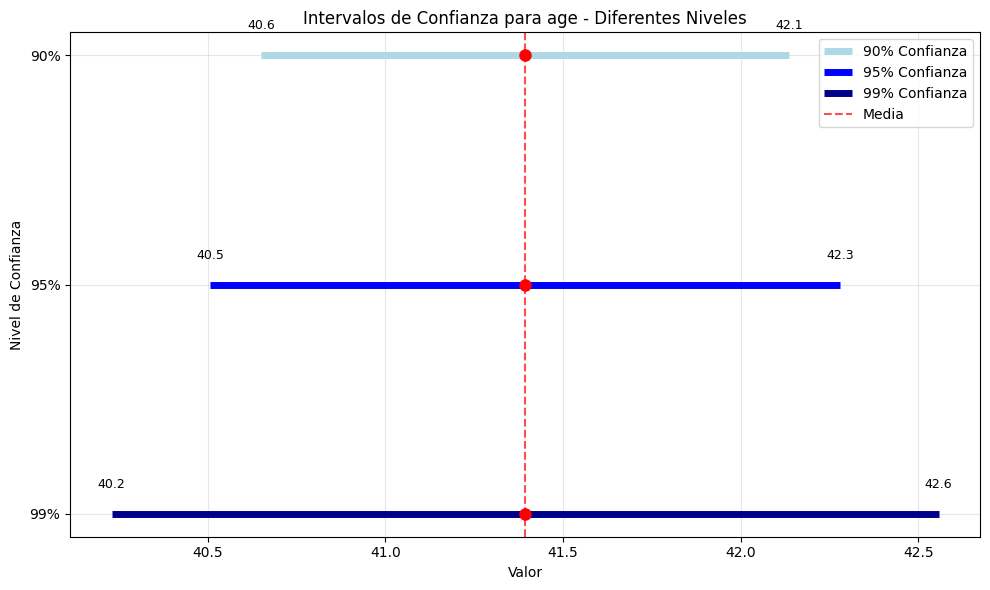

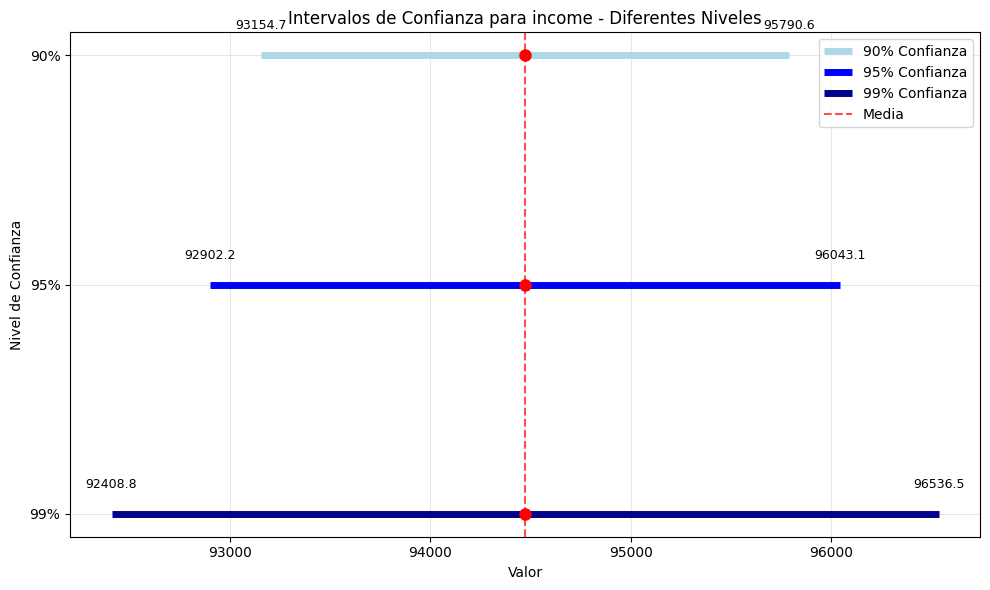

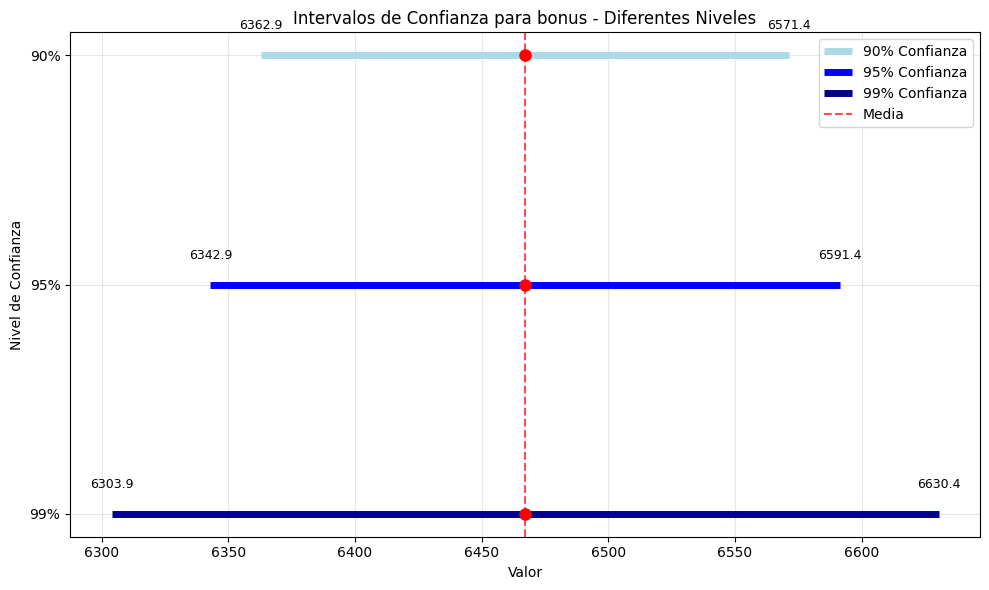

In [30]:
for column in numeric_columns:
    comparacion_niveles_confianza(df, column)

In [32]:
print("INTERPRETACIÓN PRÁCTICA DE LOS INTERVALOS DE CONFIANZA")


for col in numeric_columns:
    ic_95 = resultados_ic[col][0.95]
    
    print(f"\n {col.upper()}:")
    print(f"   • Con 95% de confianza, el valor real poblacional está entre:")
    print(f"     {ic_95['ic_inferior']:.2f} y {ic_95['ic_superior']:.2f}")
    print(f"   • Margen de error: ±{ic_95['margen_error']:.2f}")
    print(f"   • Precisión: {ic_95['margen_error']/ic_95['media']*100:.1f}% de la media")
    
    # Interpretación de precisión
    precision = (ic_95['margen_error'] / ic_95['media']) * 100
    if precision < 5:
        calidad = "EXCELENTE precisión"
    elif precision < 10:
        calidad = "BUENA precisión"
    elif precision < 20:
        calidad = "PRECISIÓN MODERADA"
    else:
        calidad = "BAJA precisión"
    
    print(f"   • Calidad de estimación: {calidad}")

INTERPRETACIÓN PRÁCTICA DE LOS INTERVALOS DE CONFIANZA

 AGE:
   • Con 95% de confianza, el valor real poblacional está entre:
     40.51 y 42.28
   • Margen de error: ±0.89
   • Precisión: 2.1% de la media
   • Calidad de estimación: EXCELENTE precisión

 INCOME:
   • Con 95% de confianza, el valor real poblacional está entre:
     92902.25 y 96043.06
   • Margen de error: ±1570.41
   • Precisión: 1.7% de la media
   • Calidad de estimación: EXCELENTE precisión

 BONUS:
   • Con 95% de confianza, el valor real poblacional está entre:
     6342.93 y 6591.39
   • Margen de error: ±124.23
   • Precisión: 1.9% de la media
   • Calidad de estimación: EXCELENTE precisión


### Deteccion de Outlier

El método del Rango Intercuartílico (IQR) se usa para identificar valores atípicos (\(outliers\)) en un conjunto de datos, especialmente cuando no hay una distribución normal. Sirve para encontrar valores que están inusualmente altos o bajos en comparación con el resto de los datos, y es robusto porque no se ve afectado por valores extremos. También se utiliza para entender la dispersión de la mitad central de los datos y como una medida de variabilidad junto con la mediana

_El método intercuartil (RIC) para la detección de valores atípicos utiliza una escala de 1,5 para detectarlos , ya que se ajusta con mayor precisión a la distribución gaussiana . Por lo tanto, el método determina que cualquier punto de datos que se encuentre 1,5 puntos por debajo del cuartil inferior o por encima del cuartil superior es un valor atípico._

In [33]:
def detectar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

In [34]:
def detectar_outliers_zscore(data, columna, umbral=3):
    # principalmente para casos donde la distribucion es normal
    from scipy import stats
    z_scores = np.abs(stats.zscore(data[columna].dropna()))
    outliers_indices = np.where(z_scores > umbral)[0]
    outliers = data.iloc[outliers_indices]
    return outliers

_La distancia de Mahalanobis se usa para detectar outliers multivariados porque mide la distancia de un punto a la media de una distribución, pero también considera la correlación entre las variables. Esto la hace más precisa que la distancia euclidiana, ya que un punto puede estar lejos de la media en un solo eje pero no ser un outlier si sigue la tendencia de las variables correlacionadas, y viceversa. Un valor de distancia de Mahalanobis alto indica un outlier_

In [35]:
def detectar_outliers_mahalanobis(df, columnas, umbral=3):
    from scipy.spatial.distance import mahalanobis
    from scipy.linalg import inv
    
    data = df[columnas].dropna()
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = inv(cov_matrix)
    media = np.mean(data, axis=0)
    
    distancias = []
    for i in range(len(data)):
        try:
            dist = mahalanobis(data.iloc[i], media, inv_cov_matrix)
            distancias.append(dist)
        except:
            distancias.append(0)
    
    outliers = data[np.array(distancias) > umbral]
    return outliers

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analisis_completo_outliers(df, columna):
    """Análisis completo de outliers para una columna"""
    
    data = df[columna].dropna()
    
    # Método IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lim_inf_iqr = Q1 - 1.5 * IQR
    lim_sup_iqr = Q3 + 1.5 * IQR
    
    # Método Z-Score
    z_scores = np.abs(stats.zscore(data))
    lim_sup_zscore = 3
    
    # Identificar outliers
    outliers_iqr = data[(data < lim_inf_iqr) | (data > lim_sup_iqr)]
    outliers_zscore = data[z_scores > lim_sup_zscore]
    
    # Estadísticas
    stats_dict = {
        'columna': columna,
        'n_total': len(data),
        'n_outliers_iqr': len(outliers_iqr),
        'n_outliers_zscore': len(outliers_zscore),
        'pct_outliers_iqr': (len(outliers_iqr) / len(data)) * 100,
        'pct_outliers_zscore': (len(outliers_zscore) / len(data)) * 100,
        'lim_inf_iqr': lim_inf_iqr,
        'lim_sup_iqr': lim_sup_iqr,
        'Q1': Q1,
        'Q3': Q3,
        'mediana': np.median(data)
    }
    
    return stats_dict, outliers_iqr, outliers_zscore

# Aplicar a todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

resultados_outliers = {}
print(" ANÁLISIS DE OUTLIERS ")

for col in numeric_columns:
    stats_dict, outliers_iqr, outliers_zscore = analisis_completo_outliers(df, col)
    resultados_outliers[col] = {
        'stats': stats_dict,
        'outliers_iqr': outliers_iqr,
        'outliers_zscore': outliers_zscore
    }
    
    print(f"\n{col}:")
    print(f"   • Outliers IQR: {stats_dict['n_outliers_iqr']} ({stats_dict['pct_outliers_iqr']:.1f}%)")
    print(f"   • Outliers Z-Score: {stats_dict['n_outliers_zscore']} ({stats_dict['pct_outliers_zscore']:.1f}%)")
    print(f"   • Límites IQR: [{stats_dict['lim_inf_iqr']:.2f}, {stats_dict['lim_sup_iqr']:.2f}]")

 ANÁLISIS DE OUTLIERS 

age:
   • Outliers IQR: 0 (0.0%)
   • Outliers Z-Score: 0 (0.0%)
   • Límites IQR: [-8.88, 92.12]

income:
   • Outliers IQR: 3 (0.3%)
   • Outliers Z-Score: 2 (0.2%)
   • Límites IQR: [24788.62, 163619.62]

bonus:
   • Outliers IQR: 0 (0.0%)
   • Outliers Z-Score: 0 (0.0%)
   • Límites IQR: [84.75, 12790.75]


In [42]:
def viz_outliers(df, col):
    data = df[col].dropna()
    
    # Calcular estadísticas si no existen en resultados_outliers
    if col not in resultados_outliers:
        stats_dict, _, _ = analisis_completo_outliers(df, col)
    else:
        stats_dict = resultados_outliers[col]['stats']
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. BOXPLOT
    axes[0, 0].boxplot(data, vert=True)
    axes[0, 0].set_title(f'Boxplot - {col}')
    axes[0, 0].set_ylabel('Valor')
    
    # Añadir líneas de referencia
    axes[0, 0].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', 
                      alpha=0.7, label=f'Lím Sup: {stats_dict["lim_sup_iqr"]:.2f}')
    axes[0, 0].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', 
                      alpha=0.7, label=f'Lím Inf: {stats_dict["lim_inf_iqr"]:.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. HISTOGRAMA con outliers destacados
    n, bins, patches = axes[0, 1].hist(data, bins=30, alpha=0.7, color='skyblue', 
                                      edgecolor='black')
    
    # Colorear outliers en rojo
    for j in range(len(bins)-1):
        bin_center = (bins[j] + bins[j+1]) / 2
        if bin_center > stats_dict['lim_sup_iqr'] or bin_center < stats_dict['lim_inf_iqr']:
            patches[j].set_facecolor('red')
            patches[j].set_alpha(0.8)
    
    axes[0, 1].axvline(stats_dict['lim_sup_iqr'], color='r', linestyle='--', linewidth=2)
    axes[0, 1].axvline(stats_dict['lim_inf_iqr'], color='r', linestyle='--', linewidth=2)
    axes[0, 1].set_title(f'Histograma - {col}')
    axes[0, 1].set_xlabel('Valor')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. SCATTER PLOT con outliers
    outliers_mask = (data < stats_dict['lim_inf_iqr']) | (data > stats_dict['lim_sup_iqr'])
    axes[1, 0].scatter(range(len(data)), data, alpha=0.6, 
                      c=outliers_mask, cmap='coolwarm', s=50)
    axes[1, 0].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 0].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 0].set_title(f'Scatter Plot - {col}')
    axes[1, 0].set_xlabel('Índice')
    axes[1, 0].set_ylabel('Valor')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. VIOLIN PLOT
    axes[1, 1].violinplot(data, showmeans=True, showmedians=True)
    axes[1, 1].set_title(f'Violin Plot - {col}')
    axes[1, 1].set_ylabel('Valor')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Añadir líneas en violin plot también
    axes[1, 1].axhline(y=stats_dict['lim_sup_iqr'], color='r', linestyle='--', alpha=0.7)
    axes[1, 1].axhline(y=stats_dict['lim_inf_iqr'], color='r', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas
    print(f"\n📊 ESTADÍSTICAS - {col}:")
    print(f"   • Total observaciones: {stats_dict['n_total']}")
    print(f"   • Outliers detectados: {stats_dict['n_outliers_iqr']} ({stats_dict['pct_outliers_iqr']:.1f}%)")
    print(f"   • Límites IQR: [{stats_dict['lim_inf_iqr']:.2f}, {stats_dict['lim_sup_iqr']:.2f}]")
    print(f"   • Rango IQR: [{stats_dict['Q1']:.2f}, {stats_dict['Q3']:.2f}]")

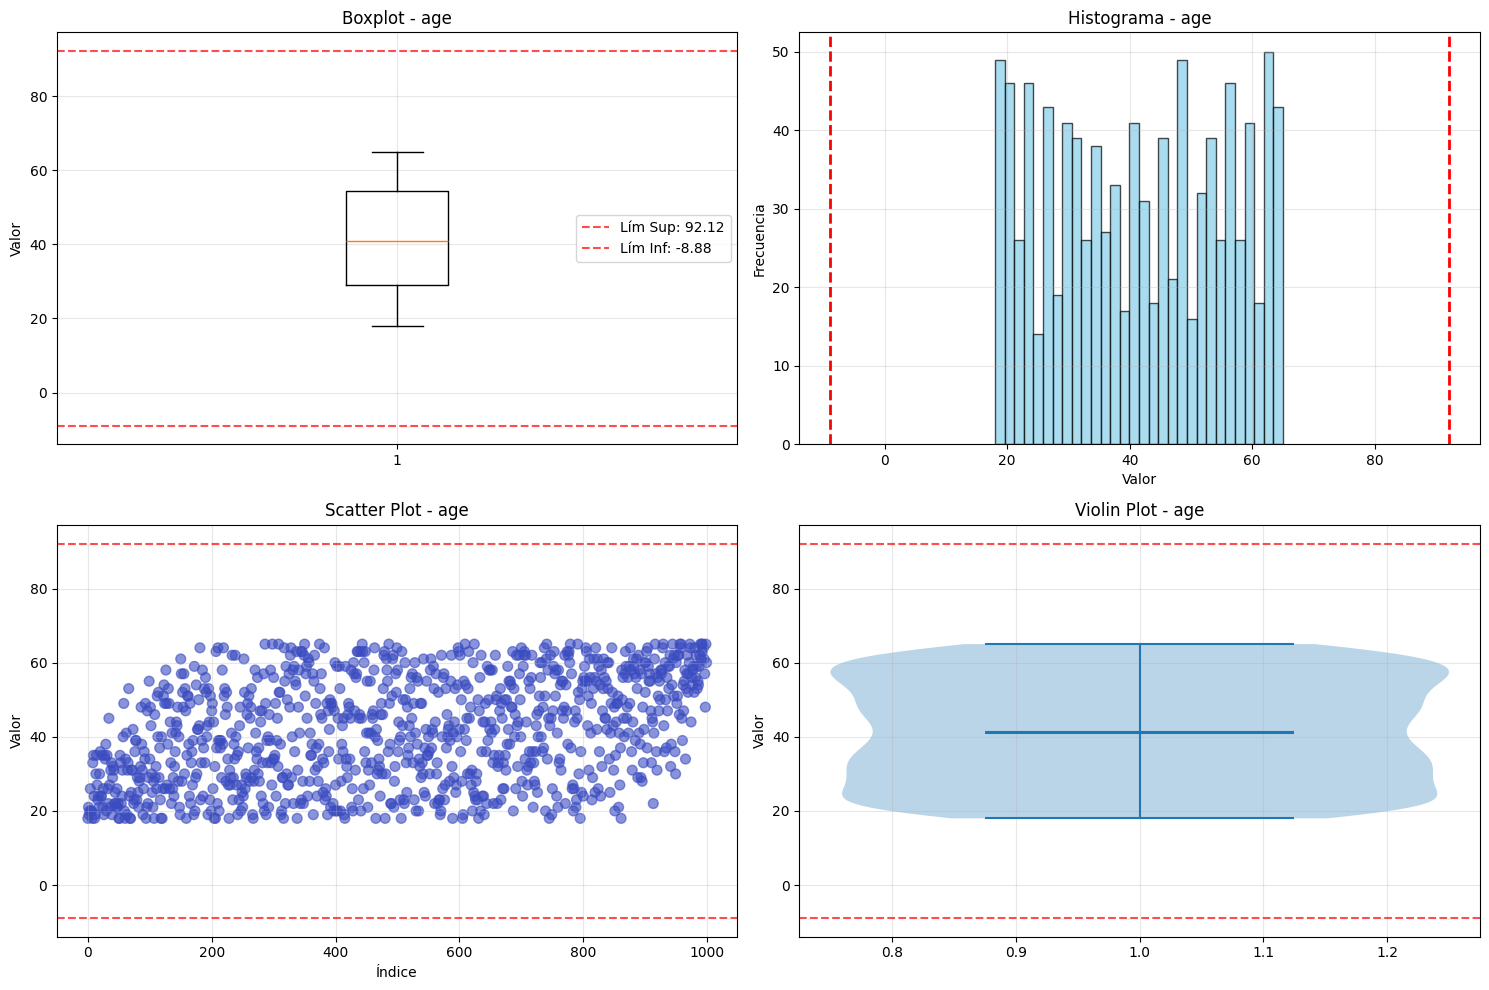


📊 ESTADÍSTICAS - age:
   • Total observaciones: 1000
   • Outliers detectados: 0 (0.0%)
   • Límites IQR: [-8.88, 92.12]
   • Rango IQR: [29.00, 54.25]


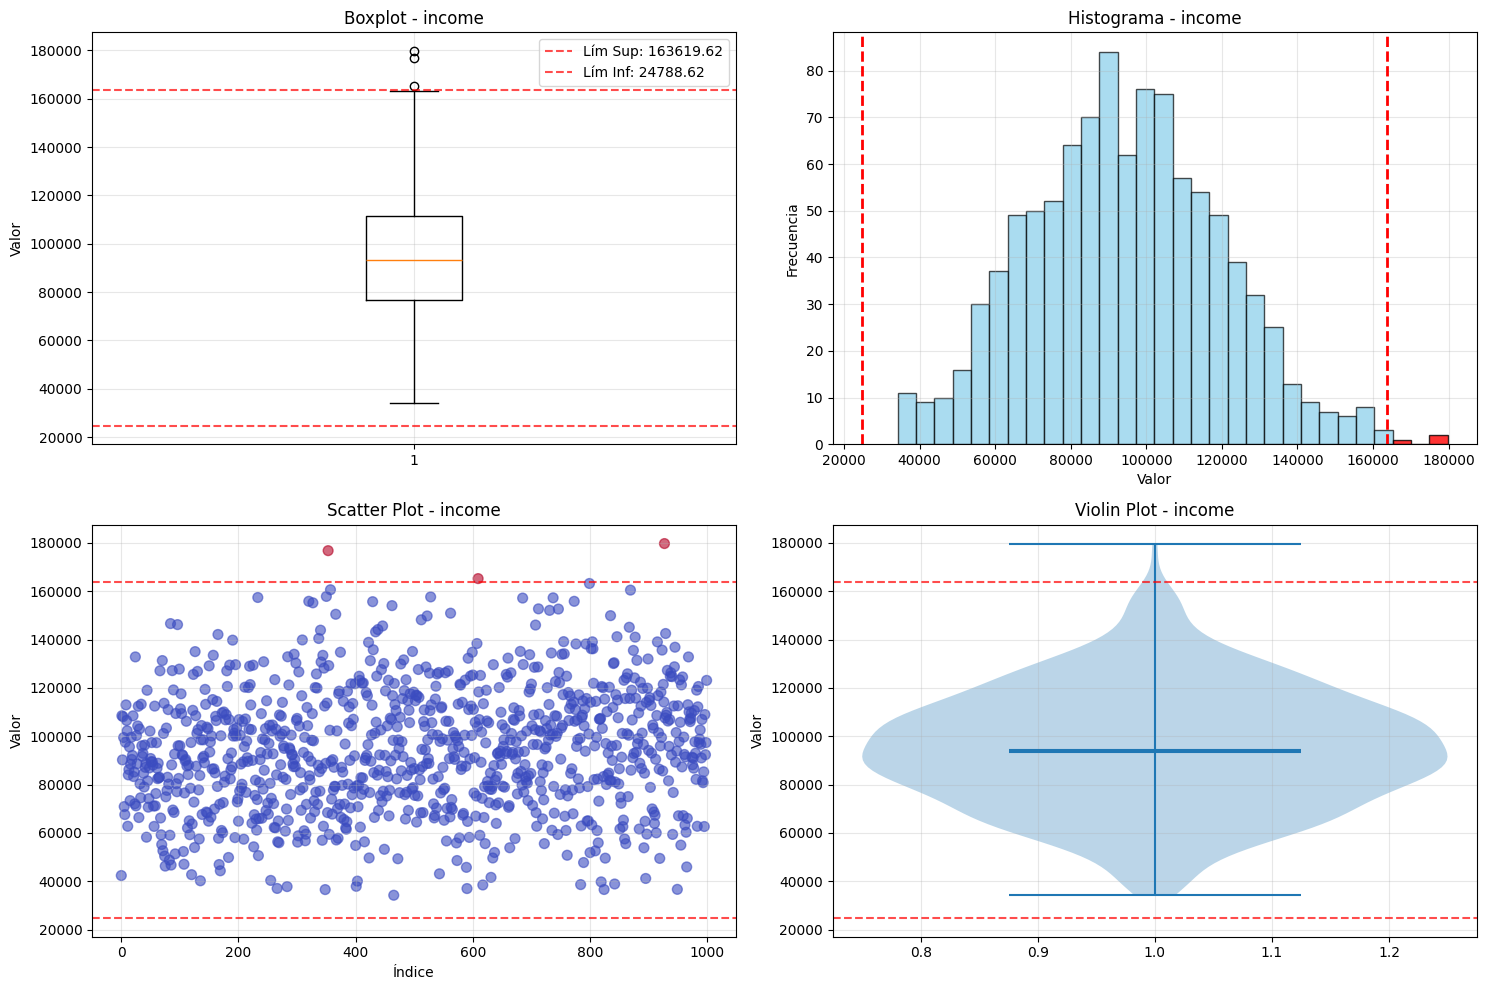


📊 ESTADÍSTICAS - income:
   • Total observaciones: 1000
   • Outliers detectados: 3 (0.3%)
   • Límites IQR: [24788.62, 163619.62]
   • Rango IQR: [76850.25, 111558.00]


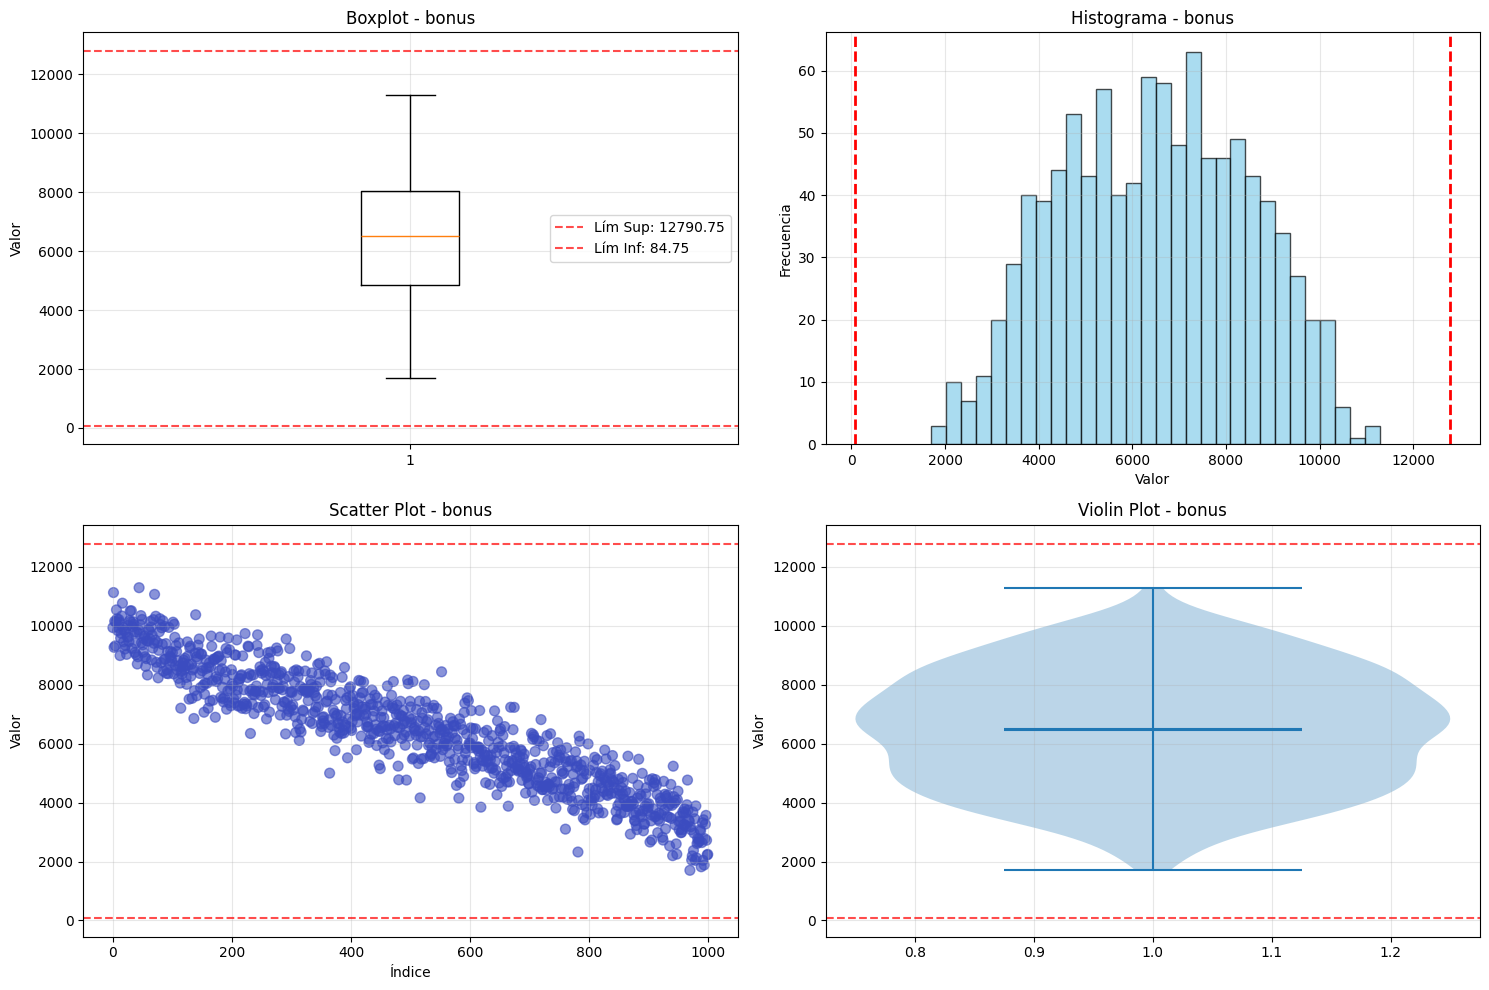


📊 ESTADÍSTICAS - bonus:
   • Total observaciones: 1000
   • Outliers detectados: 0 (0.0%)
   • Límites IQR: [84.75, 12790.75]
   • Rango IQR: [4849.50, 8026.00]


In [43]:
for column in numeric_columns:
    viz_outliers(df, column)

Tecnicas para "Remover outliers"

- Winsorizing: Reemplazar outliers con percentiles específicos

- Capping: Limitar valores a umbrales definidos

In [45]:
def aplicar_winsorizing(data, limites=(0.05, 0.95)):
    """Aplica winsorizing a los datos"""
    inferior = np.percentile(data, limites[0] * 100)
    superior = np.percentile(data, limites[1] * 100)
    
    data_winsorized = data.copy()
    data_winsorized[data_winsorized < inferior] = inferior
    data_winsorized[data_winsorized > superior] = superior
    
    return data_winsorized

def aplicar_capping(data, metodo='iqr', factor=1.5):
    """Aplica capping usando diferentes métodos"""
    data_capped = data.copy()
    
    if metodo == 'iqr':
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lim_inf = Q1 - factor * IQR
        lim_sup = Q3 + factor * IQR
        
    elif metodo == 'percentile':
        lim_inf = np.percentile(data, 1)
        lim_sup = np.percentile(data, 99)
    
    elif metodo == 'zscore':
        z_scores = np.abs(stats.zscore(data))
        lim_sup = np.mean(data) + 3 * np.std(data)
        lim_inf = np.mean(data) - 3 * np.std(data)
    
    # Aplicar capping
    data_capped[data_capped < lim_inf] = lim_inf
    data_capped[data_capped > lim_sup] = lim_sup
    
    return data_capped, lim_inf, lim_sup

# Comparación de métodos
def comparar_tecnicas_outliers(df, columna):
    """Compara diferentes técnicas de tratamiento de outliers"""
    
    original = df[columna].dropna()
    
    # Aplicar diferentes técnicas
    winsorized = aplicar_winsorizing(original)
    capped_iqr, lim_inf_iqr, lim_sup_iqr = aplicar_capping(original, 'iqr')
    capped_percentile, lim_inf_perc, lim_sup_perc = aplicar_capping(original, 'percentile')
    
    # Crear DataFrame comparativo
    comparacion = pd.DataFrame({
        'original': original,
        'winsorized': winsorized,
        'capped_iqr': capped_iqr,
        'capped_percentile': capped_percentile
    })
    
    return comparacion


In [47]:
for col in numeric_columns:
    # Aplicar a una columna de ejemplo
    comparacion = comparar_tecnicas_outliers(df, col)

    print(" COMPARACIÓN DE TÉCNICAS ")
    print(f"Columna: {col}")
    print("\nEstadísticas descriptivas:")
    print(comparacion.describe().round(2))

 COMPARACIÓN DE TÉCNICAS 
Columna: age

Estadísticas descriptivas:
       original  winsorized  capped_iqr  capped_percentile
count   1000.00     1000.00     1000.00            1000.00
mean      41.39       41.41       41.39              41.39
std       14.29       14.07       14.29              14.29
min       18.00       20.00       18.00              18.00
25%       29.00       29.00       29.00              29.00
50%       41.00       41.00       41.00              41.00
75%       54.25       54.25       54.25              54.25
max       65.00       63.00       65.00              65.00
 COMPARACIÓN DE TÉCNICAS 
Columna: income

Estadísticas descriptivas:
        original  winsorized  capped_iqr  capped_percentile
count    1000.00     1000.00     1000.00            1000.00
mean    94472.65    94274.67    94441.77           94425.95
std     25337.49    23054.19    25244.33           25116.55
min     34208.00    54788.40    34208.00           38852.58
25%     76850.25    76850.25    

/tmp/ipykernel_11646/3930573334.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54788.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_winsorized[data_winsorized < inferior] = inferior
/tmp/ipykernel_11646/3930573334.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '163619.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped > lim_sup] = lim_sup
/tmp/ipykernel_11646/3930573334.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38852.58' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_capped[data_capped < lim_inf] = lim_inf
/tmp/ipykernel_11646/3930573334.py:7: FutureWarning: S

# ** Guía Teórica: Cuándo Usar Winsorizing vs IQR vs Percentile**

## ** Comparativa Conceptual**

| Método | Concepto | Robustez | Preservación Datos | Casos Ideales |
|--------|----------|-----------|-------------------|---------------|
| **Winsorizing** | Reemplaza extremos con percentiles | Media | Alta | Datos con colas pesadas |
| **IQR (Capping)** | Corta valores beyond ±1.5×IQR | Alta | Media | Distribuciones simétricas |
| **Percentile** | Corta en percentiles fijos | Media | Baja | Conocimiento del dominio |

---

## ** WINSORIZING - Cuándo Usar**

### **Casos Ideales:**
# Ejemplos donde WINSORIZING es mejor:

-  Datos financieros (retornos, precios)
    * "Retornos de acciones: -10%, 2%, 1%, 15%, -8%, 25%, -50%"
    * "→ Winsorizing (5%, 95%) preserva la volatilidad pero controla extremos"

-  Mediciones médicas (valores biológicos)
    * "Presión arterial: 120, 118, 122, 180, 115, 200, 110"
    * "→ Los extremos pueden ser reales pero raros - winsorizing los suaviza"

-  Cuando importa la forma de la distribución
    * "Análisis de distribución de ingresos"
    * "→ Winsorizing mantiene la forma general mientras controla outliers"


# **Guía Teórica: Cuándo Usar Winsorizing vs IQR vs Percentile**

## **WINSORIZING - Cuándo Usar**

### **Casos Ideales:**

**1. Datos con colas pesadas o distribuciones asimétricas**
- Cuando los outliers son valores reales pero extremos
- Ejemplo: ingresos, precios de activos financieros, mediciones biológicas
- Preserva la forma de la distribución mientras controla valores extremos

**2. Cuando se necesita mantener el tamaño de la muestra**
- No reduce el número de observaciones
- Reemplaza valores extremos en lugar de eliminarlos
- Importante en muestras pequeñas o análisis estadísticos que requieren n constante

**3. Análisis donde la varianza es importante**
- Mantiene mejor la variabilidad original que el capping
- Ideal para análisis paramétricos posteriores

**4. Cuando los valores extremos contienen información valiosa**
- Los outliers son casos raros pero legítimos
- Ejemplo: pacientes con respuestas excepcionales a tratamientos

---

## **IQR (Capping) - Cuándo Usar**

### **Casos Ideales:**

**1. Distribuciones aproximadamente normales o simétricas**
- Cuando los datos siguen una distribución en forma de campana
- El método IQR asume cierta simetría en los datos

**2. Outliers claramente erróneos o irrelevantes**
- Errores de medición, entrada de datos o instrumentación
- Valores que no representan el fenómeno de interés
- Ejemplo: edad registrada como 200 años

**3. Control de calidad y procesos industriales**
- Cuando existen límites de especificación conocidos
- Valores fuera de rangos fisiológicos o operativos aceptables

**4. Preparación de datos para machine learning**
- Algoritmos sensibles a valores extremos
- Modelos que asumen distribución normal o rangos acotados

**5. Cuando se busca un método estandarizado y ampliamente aceptado**
- IQR es fácil de explicar y entender
- Método robusto que no depende de supuestos de normalidad

---

## **MÉTODO POR PERCENTILE - Cuándo Usar**

### **Casos Ideales:**

**1. Conocimiento previo del dominio**
- Cuando se sabe que valores beyond ciertos percentiles no son válidos
- Ejemplo: en antropometría, estaturas beyond percentil 1% o 99% pueden ser errores

**2. Datos con distribuciones muy irregulares**
- Cuando IQR no funciona bien por asimetría extrema
- Distribuciones multimodales o con gaps

**3. Benchmarking contra estándares de la industria**
- Cuando existen percentiles de referencia establecidos
- Ejemplo: percentiles de crecimiento infantil, percentiles financieros

**4. Cuando se requieren límites fijos y consistentes**
- Los percentiles no cambian entre diferentes muestras de la misma población
- Útil para comparaciones longitudinales

---

## **Comparación de Robustez**

**Winsorizing:**
- Menos distorsión de la distribución original
- Mantiene mejor las propiedades estadísticas
- Más suave con los valores extremos

**IQR:**
- Altamente robusto a outliers
- No depende de la media ni desviación estándar
- Funciona bien con distribuciones no normales

**Percentile:**
- Poco robusto con muestras pequeñas
- Sensible a la elección arbitraria de percentiles
- Puede eliminar datos válidos

---

## **Recomendaciones por Contexto**

**Investigación Científica:**
- Winsorizing para preservar información
- IQR cuando los outliers son errores de medición

**Finanzas y Economía:**
- Winsorizing para mantener las colas de distribución
- Percentiles para análisis de riesgo (VaR)

**Machine Learning:**
- IQR para la mayoría de casos
- Winsorizing cuando los outliers contienen información predictiva

**Control de Calidad:**
- IQR o percentiles basados en especificaciones
- Límites definidos por el proceso

---

## **Consideraciones Prácticas**

**Tamaño de Muestra:**
- Muestras pequeñas: Winsorizing o IQR
- Muestras grandes: Cualquier método funciona bien

**Propósito del Análisis:**
- Análisis exploratorio: Probar múltiples métodos
- Análisis inferencial: Winsorizing suave
- Modelado predictivo: IQR o eliminación

**Distribución de los Datos:**
- Simétrica: IQR
- Asimétrica: Winsorizing
- Multimodal: Percentiles específicos por modo

La elección depende fundamentalmente de si consideramos que los outliers representan información valiosa o deben ser tratados como anomalías a controlar.